<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Economics/blob/main/Global_Economy_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


World finance indicators data from 1970-2021

Data Set Information:
The dataset is compiled from the National Accounts Main Aggregates Database that presents a series of analytical national accounts tables from 1970 onwards for more than 200 countries and areas of the world. It is the product of a global cooperation effort between the Economic Statistics Branch of the United Nations Statistics Division, international statistical agencies, and the national statistical services of these countries and is developed in accordance with the recommendation of the Statistical Commission at its first session in 1947 that the Statistics Division should publish regularly the most recent available data on national accounts for as many countries and areas as possible.

This dataset can be used to perform clustering, regression, and time series tasks.

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
import numpy as np
from scipy.stats import gamma
from scipy.optimize import minimize
pd.set_option('display.max_columns', None)

In [14]:
file_path = "/content/drive/MyDrive/경제학/Global Economy Indicators.csv"
df = pd.read_csv(file_path)

In [15]:
df.columns = df.columns.str.strip()

###EDA

In [16]:
df.columns

Index(['CountryID', 'Country', 'Year', 'AMA exchange rate',
       'IMF based exchange rate', 'Population', 'Currency', 'Per capita GNI',
       'Agriculture, hunting, forestry, fishing (ISIC A-B)',
       'Changes in inventories', 'Construction (ISIC F)',
       'Exports of goods and services', 'Final consumption expenditure',
       'General government final consumption expenditure',
       'Gross capital formation',
       'Gross fixed capital formation (including Acquisitions less disposals of valuables)',
       'Household consumption expenditure (including Non-profit institutions serving households)',
       'Imports of goods and services', 'Manufacturing (ISIC D)',
       'Mining, Manufacturing, Utilities (ISIC C-E)',
       'Other Activities (ISIC J-P)', 'Total Value Added',
       'Transport, storage and communication (ISIC I)',
       'Wholesale, retail trade, restaurants and hotels (ISIC G-H)',
       'Gross National Income(GNI) in USD', 'Gross Domestic Product (GDP)'],
    

In [17]:
df.head()

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,Construction (ISIC F),Exports of goods and services,Final consumption expenditure,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation (including Acquisitions less disposals of valuables),Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,46793902.0,165618722.0,1.663221e+09,112126986.0,94611818.0,94611818.0,1.551094e+09,195277226.0,370146827.0,376690811.0,127747843.0,1.731454e+09,83917200.0,226387091.0,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,48994113.0,193580300.0,1.796541e+09,121114833.0,99012350.0,99012350.0,1.675426e+09,276296480.0,387549502.0,394401164.0,133754097.0,1.812857e+09,87860382.0,237019196.0,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,44535223.0,227654380.0,1.607159e+09,108347543.0,103456794.0,103456794.0,1.498812e+09,290370350.0,352284669.0,358512865.0,121582672.0,1.647918e+09,79864525.0,215477287.0,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,46018542.0,226913554.0,1.617037e+09,109013455.0,121728433.0,121728433.0,1.508024e+09,262962880.0,364010279.0,370445793.0,125630236.0,1.702735e+09,82528885.0,222624293.0,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,55721659.0,284938449.0,1.907408e+09,128588961.0,175061875.0,175061875.0,1.778819e+09,305679151.0,440760406.0,448552790.0,152119162.0,2.061752e+09,99918604.0,269525910.0,2.106420e+09,2.061729e+09


In [18]:
print(f"Total countries in the data {df.Country.nunique()}\n")
print(f"The data is available form year {df.Year.min()} to year {df.Year.max()}\n")

Total countries in the data 220

The data is available form year 1970 to year 2021



In [19]:
df.drop(['CountryID','Currency'], axis = 1, inplace = True)

In [20]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_cols.remove('Year')
print(f"numeric columns :\n {numeric_cols}\n")
print(f"total numeric cols {len(numeric_cols)}\n")

numeric columns :
 ['AMA exchange rate', 'IMF based exchange rate', 'Population', 'Per capita GNI', 'Agriculture, hunting, forestry, fishing (ISIC A-B)', 'Changes in inventories', 'Construction (ISIC F)', 'Exports of goods and services', 'Final consumption expenditure', 'General government final consumption expenditure', 'Gross capital formation', 'Gross fixed capital formation (including Acquisitions less disposals of valuables)', 'Household consumption expenditure (including Non-profit institutions serving households)', 'Imports of goods and services', 'Manufacturing (ISIC D)', 'Mining, Manufacturing, Utilities (ISIC C-E)', 'Other Activities (ISIC J-P)', 'Total Value Added', 'Transport, storage and communication (ISIC I)', 'Wholesale, retail trade, restaurants and hotels (ISIC G-H)', 'Gross National Income(GNI) in USD', 'Gross Domestic Product (GDP)']

total numeric cols 22



In [21]:
df.isna().sum()

,0
Country,0
Year,0
AMA exchange rate,0
IMF based exchange rate,0
Population,0
Per capita GNI,0
"Agriculture, hunting, forestry, fishing (ISIC A-B)",121
Changes in inventories,1841
Construction (ISIC F),0
Exports of goods and services,21


In [22]:
cols_with_missing = df.columns[df.isnull().any()].tolist()

for col in cols_with_missing:
    mode_or_mean_by_country = df.groupby('Country')[col].agg(lambda x: x.mode().iloc[0] if x.dtype == 'object' else x.mean())
    for country in df['Country'].unique():
        country_mask = df['Country'] == country
        if df[col].dtype == 'object':
            mode_value = mode_or_mean_by_country[country]
            df.loc[country_mask, col] = df.loc[country_mask, col].fillna(mode_value)
        else:
            mean_value = mode_or_mean_by_country[country]
            df.loc[country_mask, col] = df.loc[country_mask, col].fillna(mean_value)

In [23]:
df.isna().sum()

,0
Country,0
Year,0
AMA exchange rate,0
IMF based exchange rate,0
Population,0
Per capita GNI,0
"Agriculture, hunting, forestry, fishing (ISIC A-B)",121
Changes in inventories,680
Construction (ISIC F),0
Exports of goods and services,21


In [24]:
unique_countries = df['Country'].unique()
for country in unique_countries:
    country_df = df[df['Country'] == country]
    nan_columns = country_df.columns[country_df.isnull().any()].tolist()
    if nan_columns:
        print("Country:", country)
        print("Columns with NaN values:", nan_columns)
        print()

Country:  Afghanistan 
Columns with NaN values: ['Changes in inventories']

Country:  Antigua and Barbuda 
Columns with NaN values: ['Changes in inventories']

Country:  Czechoslovakia (Former) 
Columns with NaN values: ['Imports of goods and services']

Country:  Ethiopia (Former) 
Columns with NaN values: ['Changes in inventories']

Country:  Eritrea 
Columns with NaN values: ['Changes in inventories']

Country:  Gambia 
Columns with NaN values: ['Changes in inventories']

Country:  Guyana 
Columns with NaN values: ['Changes in inventories']

Country:  Haiti 
Columns with NaN values: ['Changes in inventories']

Country:  D.P.R. of Korea 
Columns with NaN values: ['Changes in inventories', 'General government final consumption expenditure', 'Gross capital formation', 'Gross fixed capital formation (including Acquisitions less disposals of valuables)', 'Household consumption expenditure (including Non-profit institutions serving households)']

Country:  China, Macao SAR 
Columns with N

In [25]:
correlation_matrix = df[numeric_cols].corr()
gdp_corr = correlation_matrix['Gross Domestic Product (GDP)'].drop('Gross Domestic Product (GDP)')
highest_positive_corr = gdp_corr.nlargest(4)
highest_negative_corr = gdp_corr.nsmallest(4)
near_zero_corr = gdp_corr[abs(gdp_corr) < 0.1]
print("Columns with highest positive correlation with GDP:")
print(highest_positive_corr)
print("\nColumns with highest negative correlation with GDP:")
print(highest_negative_corr)
print("\nColumns with correlation close to zero with GDP:")
print(near_zero_corr)

Columns with highest positive correlation with GDP:
Gross National Income(GNI) in USD                             0.999887
Total Value Added                                             0.999477
Wholesale, retail trade, restaurants and hotels (ISIC G-H)    0.991643
Transport, storage and communication (ISIC I)                 0.991226
Name: Gross Domestic Product (GDP), dtype: float64

Columns with highest negative correlation with GDP:
IMF based exchange rate   -0.003951
AMA exchange rate         -0.001771
Per capita GNI             0.215710
Population                 0.398581
Name: Gross Domestic Product (GDP), dtype: float64

Columns with correlation close to zero with GDP:
AMA exchange rate         -0.001771
IMF based exchange rate   -0.003951
Name: Gross Domestic Product (GDP), dtype: float64


In [26]:
combined_columns = set(highest_positive_corr.index) | set(highest_negative_corr.index) | set(near_zero_corr.index)
selected_columns = list(combined_columns)
print(f"Selected cols for furteher analysis to check their effect on the GDP of a country:\n{selected_columns}")
df_selected_columns = df[['Country']+selected_columns + ['Gross Domestic Product (GDP)']]

Selected cols for furteher analysis to check their effect on the GDP of a country:
['Population', 'Total Value Added', 'AMA exchange rate', 'Per capita GNI', 'Wholesale, retail trade, restaurants and hotels (ISIC G-H)', 'Transport, storage and communication (ISIC I)', 'Gross National Income(GNI) in USD', 'IMF based exchange rate']


In [27]:
def plot_dist(col):
    sns.histplot(df[col], kde=True,bins=10)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Distribution Plot')
    plt.show()

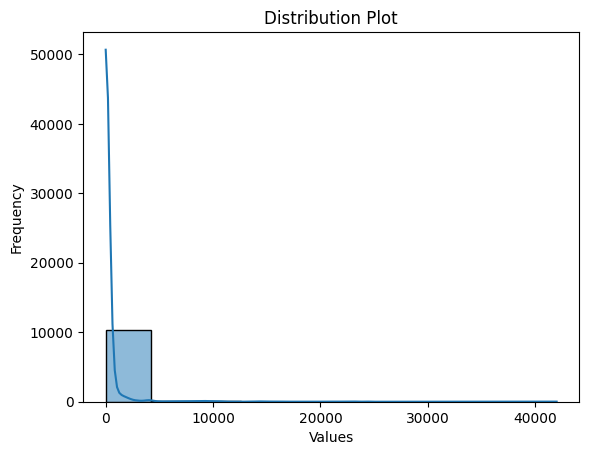

In [28]:
plot_dist('IMF based exchange rate')

In [29]:
quantiles = df_selected_columns[selected_columns].quantile([0.25, 0.75])
IQR = quantiles.loc[0.75] - quantiles.loc[0.25]
lower_bound = quantiles.loc[0.25] - 1.5 * IQR
upper_bound = quantiles.loc[0.75] + 1.5 * IQR
for col in selected_columns:
    df_selected_columns = df_selected_columns[(df_selected_columns[col] >= lower_bound[col]) & (df_selected_columns[col] <= upper_bound[col])]

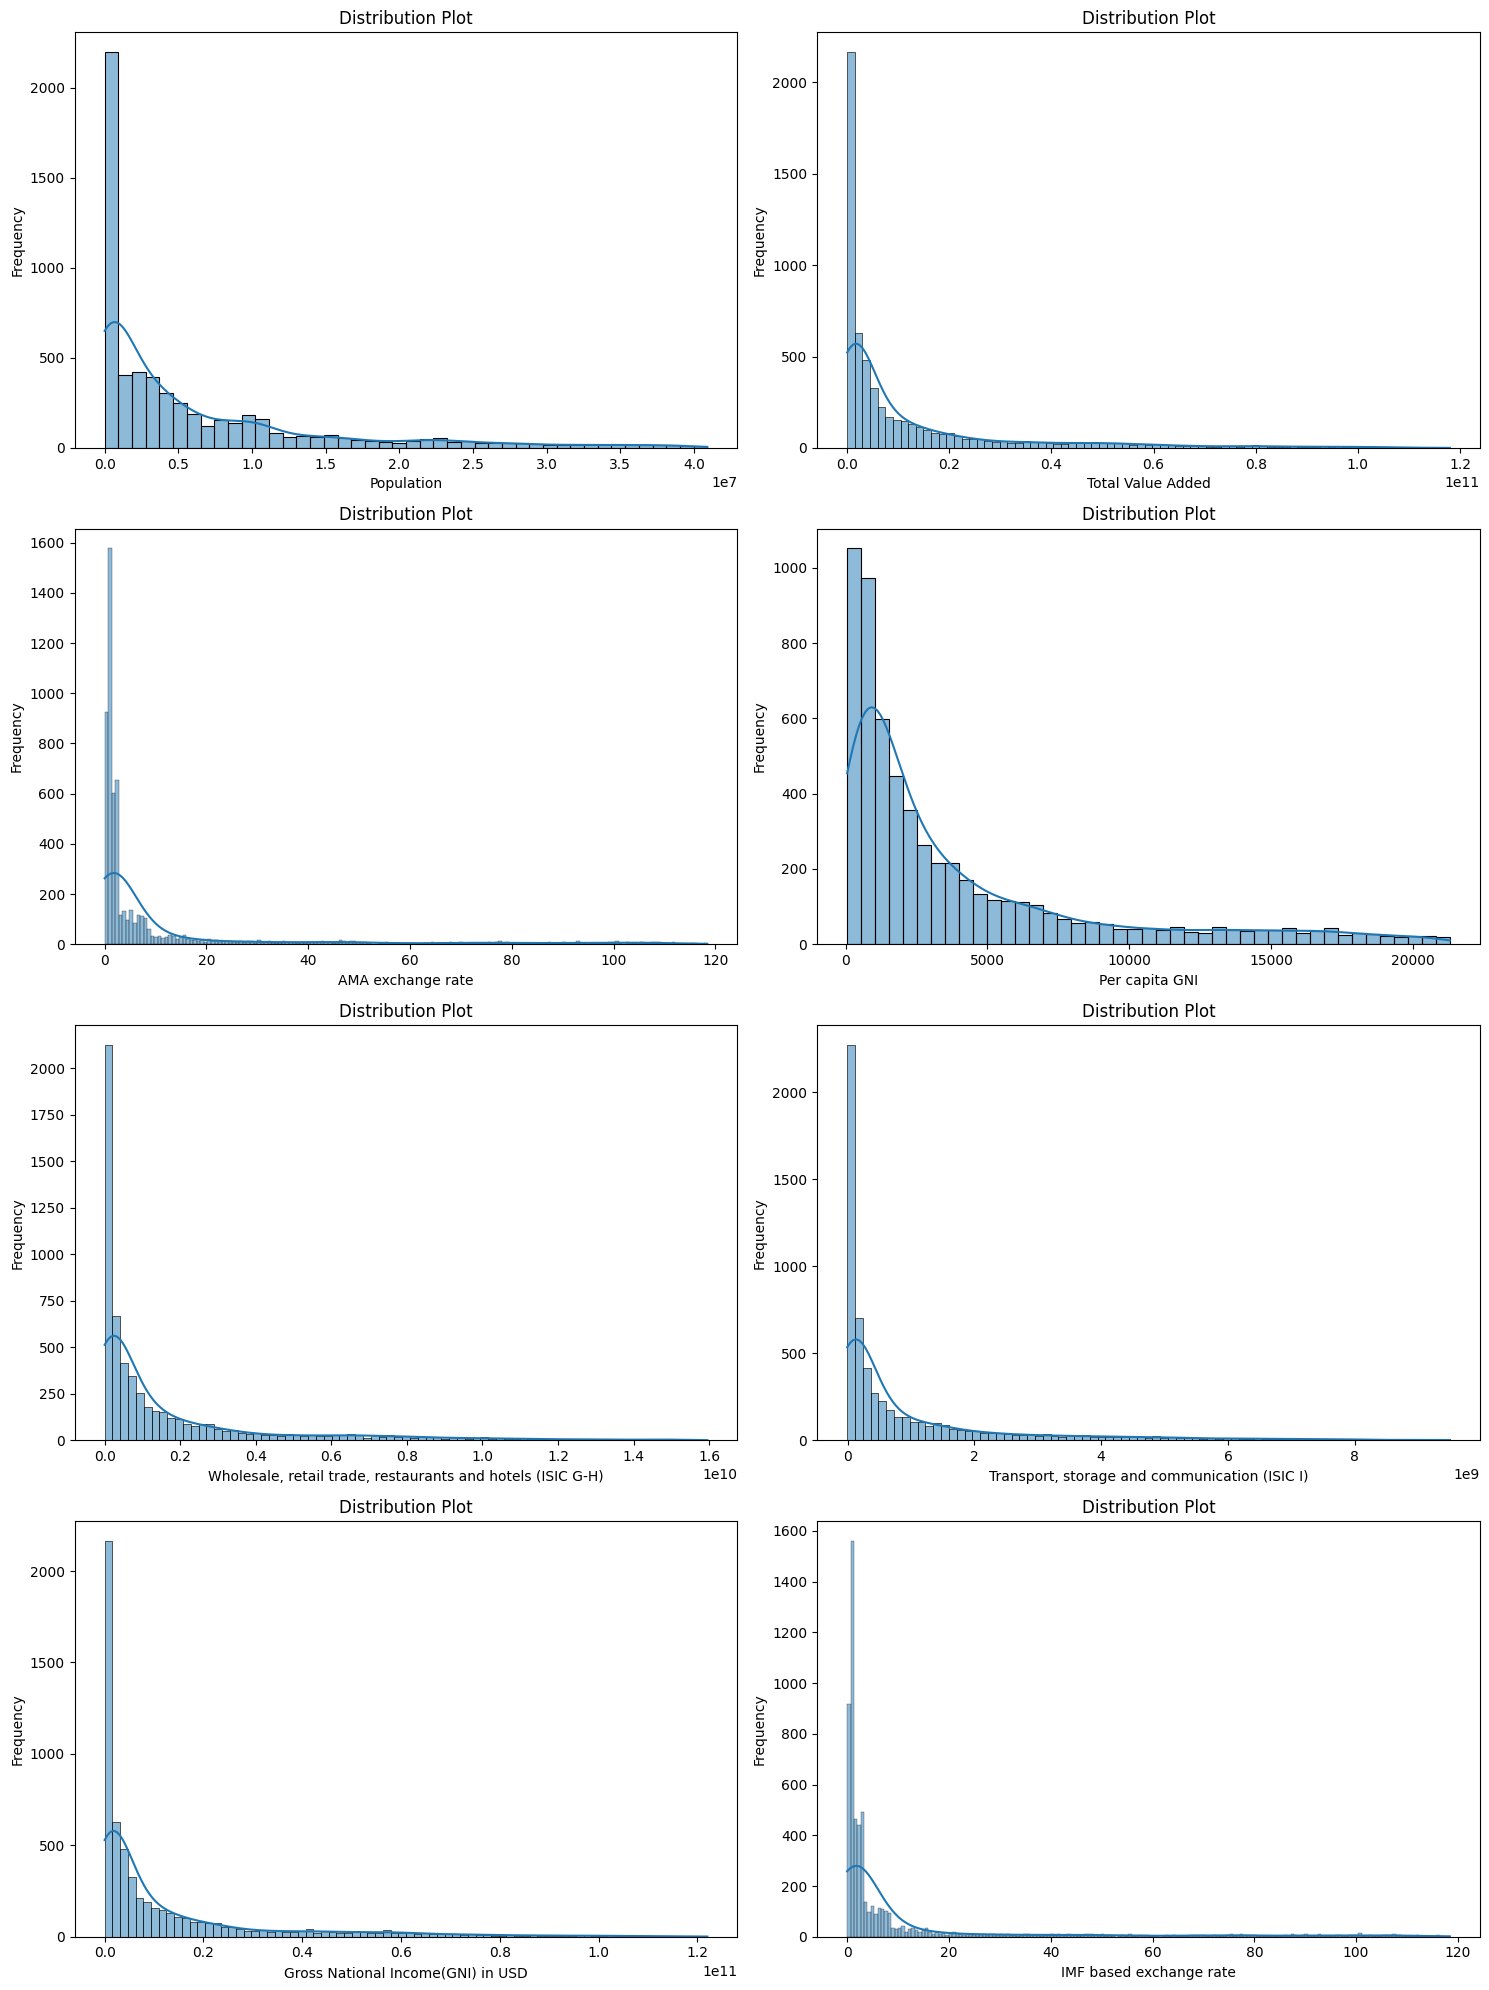

In [30]:
num_rows = int(len(selected_columns)/2)
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))
axes = axes.flatten()
for i, col in enumerate(selected_columns):
    sns.histplot(df_selected_columns[col], kde=True, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title('Distribution Plot')
plt.tight_layout()
plt.show()

###Part 1
The above plots approximately indicates that the distribution resembles the gamma distribution, so considering the Transport, storage and communication (ISIC I) and IMF based exchange rate for further analysi

Fitted Parameters for Population :

Shape (alpha): 0.47300511759113034
Location (loc): 4358.999999999999
Scale (beta): 10442974.945010394


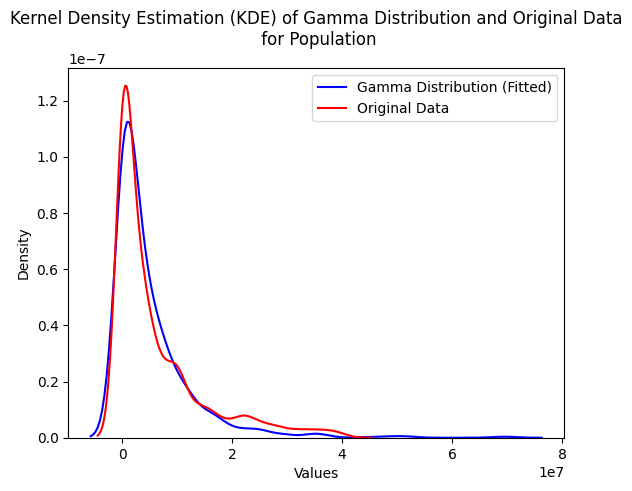

Fitted Parameters for Total Value Added :

Shape (alpha): 0.470355001101339
Location (loc): 2411112.9999999995
Scale (beta): 24405355608.307587


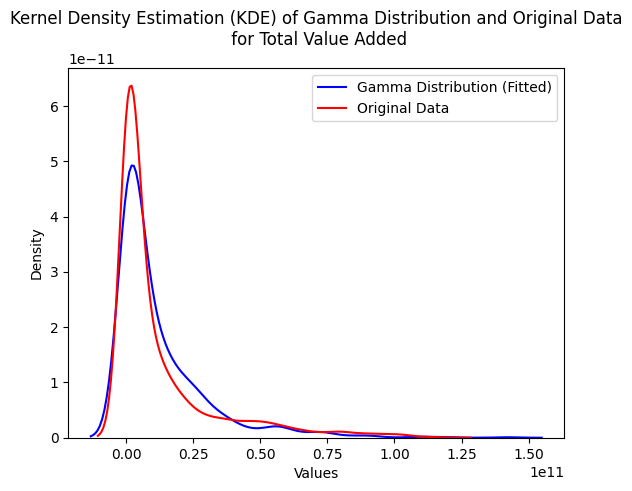

Fitted Parameters for AMA exchange rate :

Shape (alpha): 0.36758094483502063
Location (loc): 4.299999999990319e-14
Scale (beta): 71.43700686730998


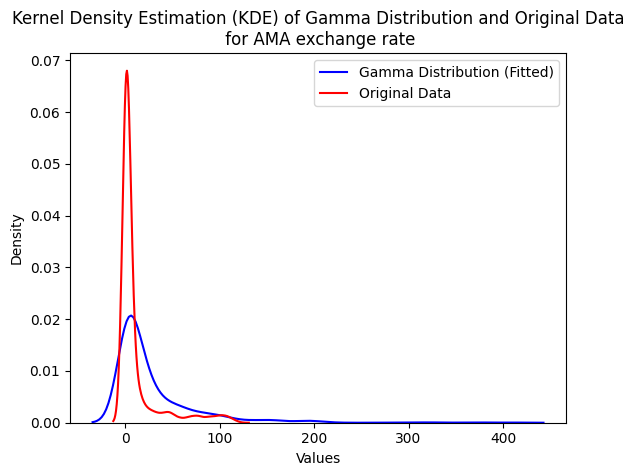

Fitted Parameters for Per capita GNI :

Shape (alpha): 0.8337895125235228
Location (loc): 57.999999999999986
Scale (beta): 4012.8444054606434


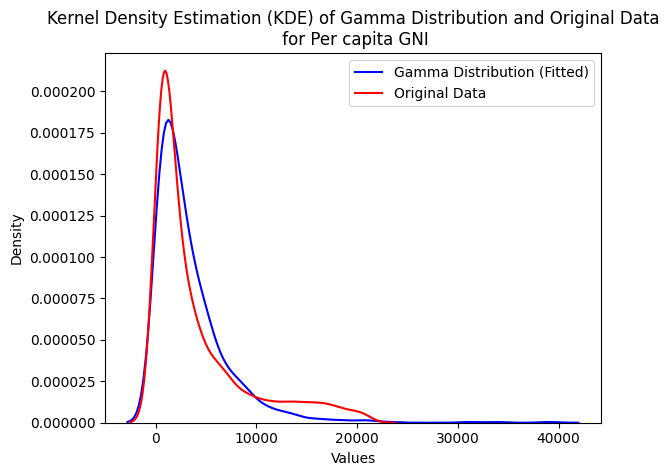

Fitted Parameters for Wholesale, retail trade, restaurants and hotels (ISIC G-H) :

Shape (alpha): 0.42714483673112025
Location (loc): 230208.99999999997
Scale (beta): 4046337387.023322


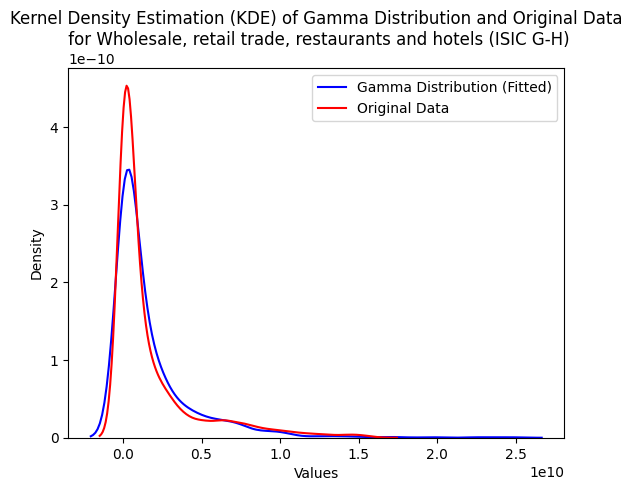

Fitted Parameters for Transport, storage and communication (ISIC I) :

Shape (alpha): 0.45845489897534875
Location (loc): -6479048.000000001
Scale (beta): 2147405435.8944032


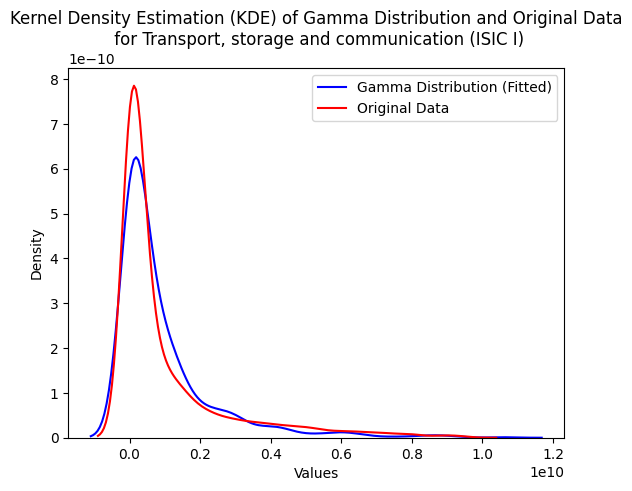

Fitted Parameters for Gross National Income(GNI) in USD :

Shape (alpha): 0.43986136786453944
Location (loc): 3564832.999999999
Scale (beta): 27531613026.879005


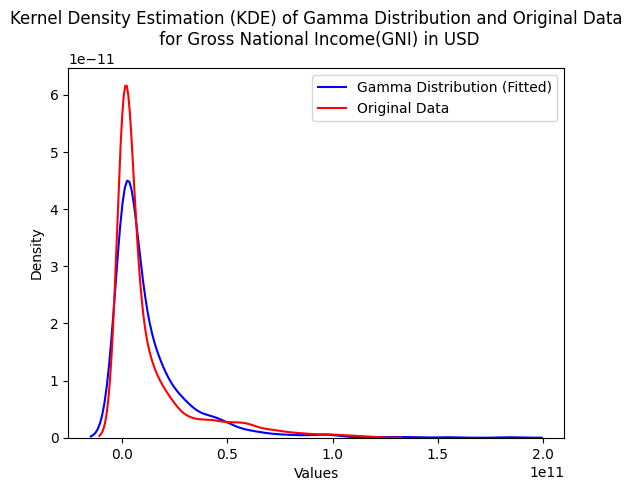

Fitted Parameters for IMF based exchange rate :

Shape (alpha): 0.2699131641305027
Location (loc): 4.2999999994375074e-14
Scale (beta): 78.08884588592784


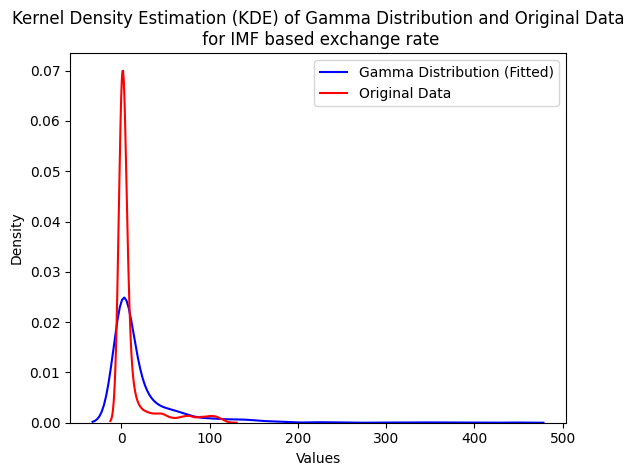

In [31]:
for col in selected_columns:
    data = df_selected_columns[col]
    fit_alpha, fit_loc, fit_beta = stats.gamma.fit(data)

    print(f"Fitted Parameters for {col} :\n")
    print("Shape (alpha):", fit_alpha)
    print("Location (loc):", fit_loc)
    print("Scale (beta):", fit_beta)

    gamma_dist = stats.gamma(a=fit_alpha, loc=fit_loc, scale=fit_beta)
    random_numbers = gamma_dist.rvs(size=1000)
    sns.kdeplot(random_numbers, label='Gamma Distribution (Fitted)', color='blue')
    sns.kdeplot(data, label='Original Data', color='red')
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title(f'Kernel Density Estimation (KDE) of Gamma Distribution and Original Data\n for {col}')
    plt.legend()
    plt.show()

Fitted Parameters for Population :

Location (loc): 4359.0
Scale (scale): 6140998.207207208


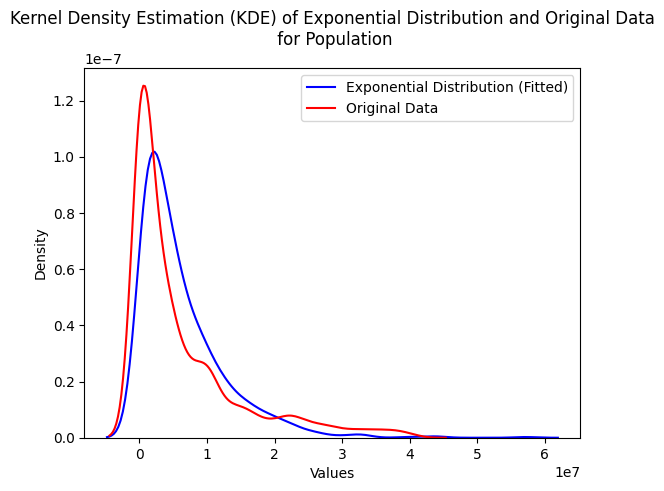

Fitted Parameters for Total Value Added :

Location (loc): 2411113.0
Scale (scale): 12461079337.831999


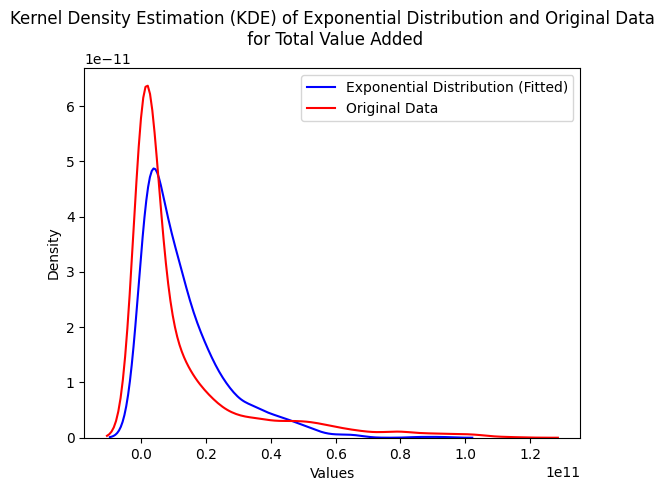

Fitted Parameters for AMA exchange rate :

Location (loc): 4.3e-14
Scale (scale): 11.64268106283129


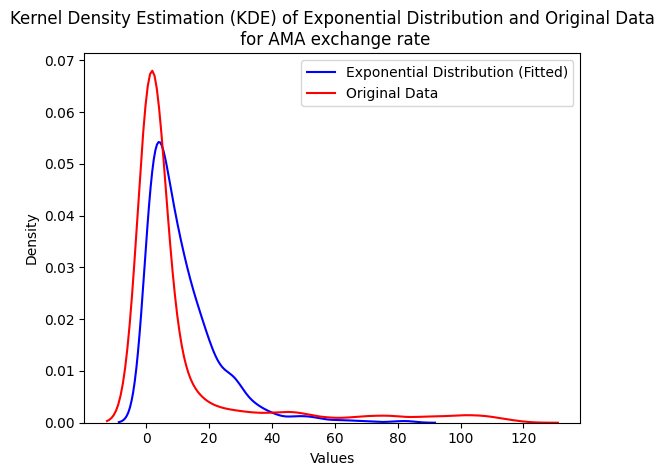

Fitted Parameters for Per capita GNI :

Location (loc): 58.0
Scale (scale): 3957.3104771438107


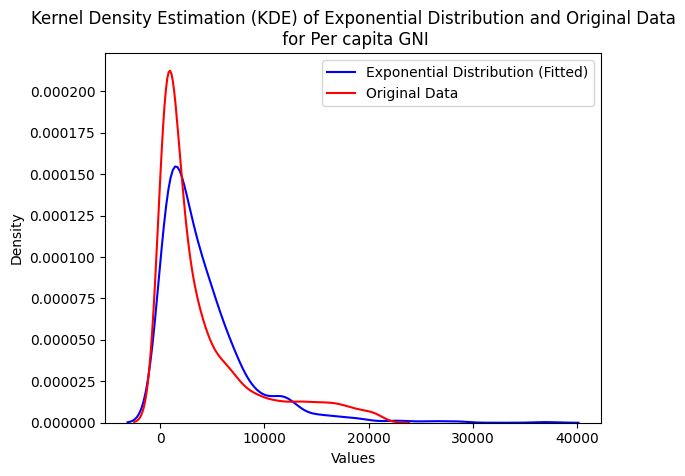

Fitted Parameters for Wholesale, retail trade, restaurants and hotels (ISIC G-H) :

Location (loc): 230209.0
Scale (scale): 1746881278.2519186


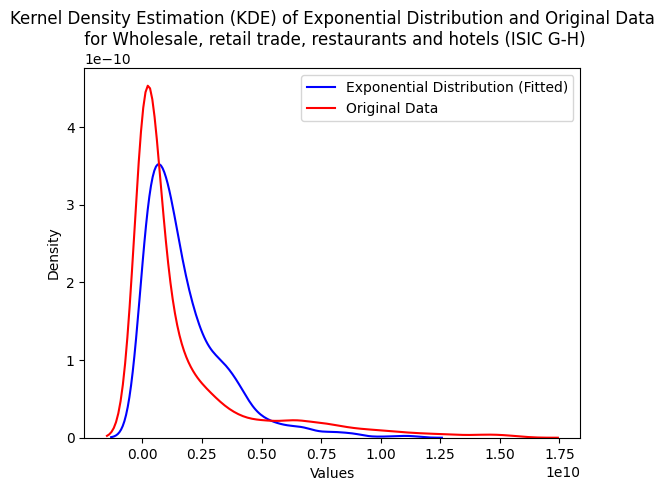

Fitted Parameters for Transport, storage and communication (ISIC I) :

Location (loc): -6479048.0
Scale (scale): 1021467050.4426093


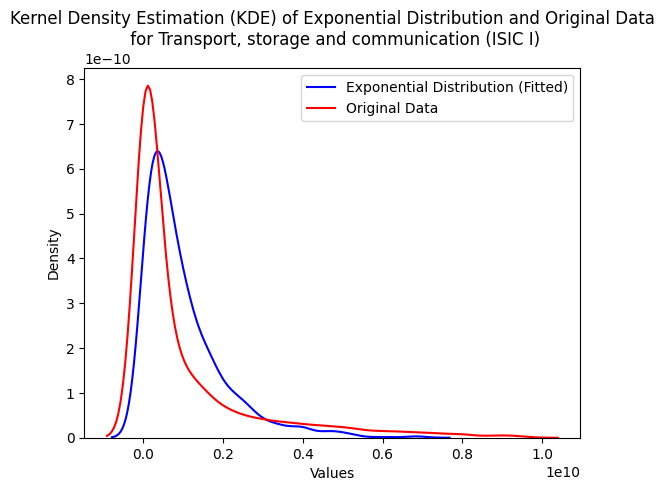

Fitted Parameters for Gross National Income(GNI) in USD :

Location (loc): 3564833.0
Scale (scale): 12879608645.924091


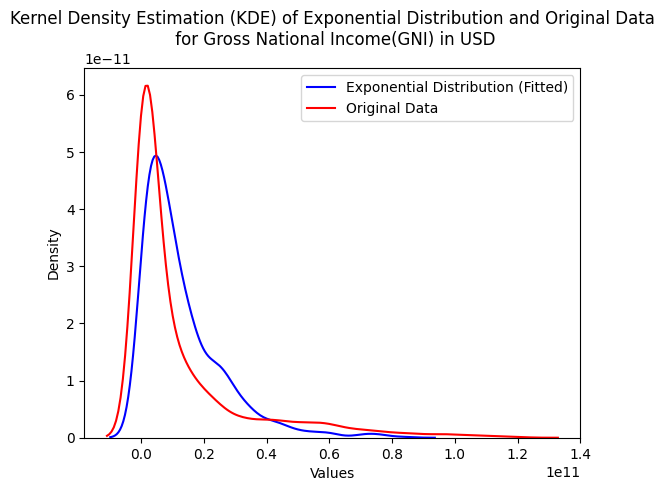

Fitted Parameters for IMF based exchange rate :

Location (loc): 4.3e-14
Scale (scale): 11.129513914341322


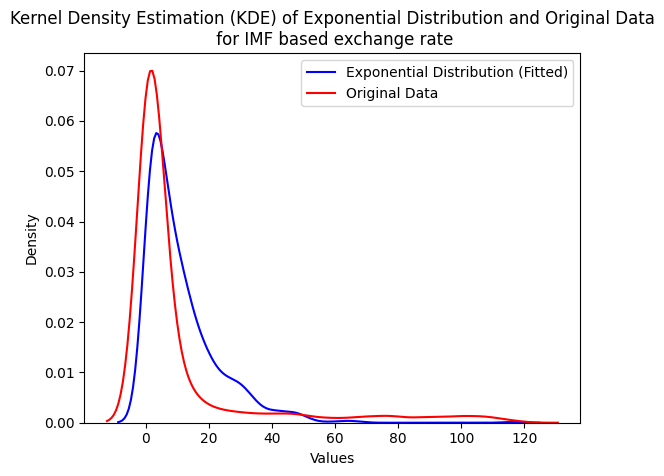

In [32]:
for col in selected_columns:
    data = df_selected_columns[col]
    fit_loc, fit_scale = stats.expon.fit(data)

    print(f"Fitted Parameters for {col} :\n")
    print("Location (loc):", fit_loc)
    print("Scale (scale):", fit_scale)

    exponential_dist = stats.expon(loc=fit_loc, scale=fit_scale)
    random_numbers = exponential_dist.rvs(size=1000)
    sns.kdeplot(random_numbers, label='Exponential Distribution (Fitted)', color='blue')
    sns.kdeplot(data, label='Original Data', color='red')
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title(f'Kernel Density Estimation (KDE) of Exponential Distribution and Original Data\n for {col}')
    plt.legend()
    plt.show()

###The above plots shows that the gamma best represents the data features selected
###Part 2¶

Index(['Country', 'Population', 'Total Value Added', 'AMA exchange rate',
       'Per capita GNI',
       'Wholesale, retail trade, restaurants and hotels (ISIC G-H)',
       'Transport, storage and communication (ISIC I)',
       'Gross National Income(GNI) in USD', 'IMF based exchange rate',
       'Gross Domestic Product (GDP)',
       'General government final consumption expenditure'],
      dtype='object')


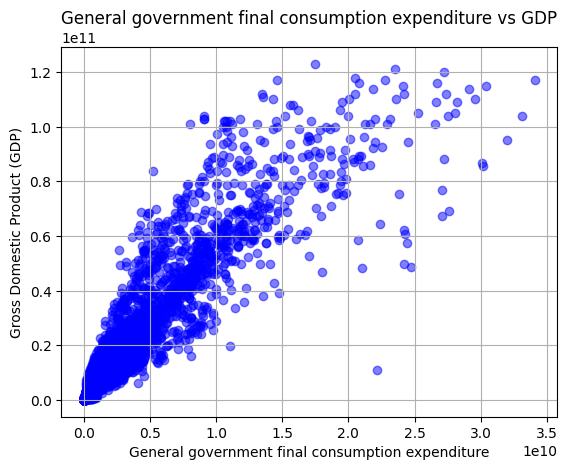

In [39]:
print(df_selected_columns.columns)
df_selected_columns['General government final consumption expenditure'] = df['General government final consumption expenditure']


plt.scatter(df_selected_columns['General government final consumption expenditure'],
            df_selected_columns['Gross Domestic Product (GDP)'],
            alpha=0.5, color='blue')
plt.xlabel('General government final consumption expenditure')
plt.ylabel('Gross Domestic Product (GDP)')
plt.title('General government final consumption expenditure vs GDP')
plt.grid(True)
plt.show()

In [40]:
x_data = df_selected_columns['General government final consumption expenditure']
y_data = df_selected_columns['Gross Domestic Product (GDP)']

scaler = MinMaxScaler()

x_scaled = scaler.fit_transform(x_data.values.reshape(-1, 1))
y_scaled = scaler.fit_transform(y_data.values.reshape(-1, 1))
slope, intercept, r_value, p_value, std_err = stats.linregress(x_scaled.flatten(), y_scaled.flatten())

p_value_slope = p_value
p_value_intercept = stats.t.sf(abs(intercept / std_err), len(x_scaled) - 1) * 2

print("Linear Regression Results:")
print("Slope:", slope)
print("P-value for Slope:", p_value_slope)
print("Intercept:", intercept)
print("P-value for Intercept:", p_value_intercept)
print("R-squared:", r_value**2)
print("Standard Error:", std_err)

alpha = 0.055

if p_value_slope < alpha:
    print("Based on the p-value of the slope coefficient:")
    print("Null Hypothesis (H0): There is no linear relationship between General government final consumption expenditure and GDP")
    print("Alternative Hypothesis (H1): There is a linear relationship between General government final consumption expenditure and GDP")
    print("Conclusion: Reject the null hypothesis. There is evidence of a linear relationship between the variables.")
else:
    print("Based on the p-value of the slope coefficient:")
    print("Null Hypothesis (H0): There is no linear relationship between General government final consumption expenditure and GDP")
    print("Alternative Hypothesis (H1): There is a linear relationship between General government final consumption expenditure and GDP")
    print("Conclusion: Fail to reject the null hypothesis. There is insufficient evidence of a linear relationship between the variables.")

Linear Regression Results:
Slope: nan
P-value for Slope: nan
Intercept: nan
P-value for Intercept: nan
R-squared: nan
Standard Error: nan
Based on the p-value of the slope coefficient:
Null Hypothesis (H0): There is no linear relationship between General government final consumption expenditure and GDP
Alternative Hypothesis (H1): There is a linear relationship between General government final consumption expenditure and GDP
Conclusion: Fail to reject the null hypothesis. There is insufficient evidence of a linear relationship between the variables.


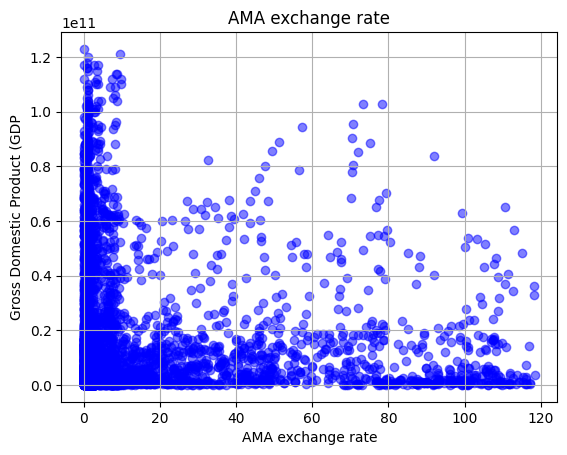

In [41]:
plt.scatter(df_selected_columns['AMA exchange rate'], df_selected_columns['Gross Domestic Product (GDP)'], alpha=0.5, color='blue')
plt.xlabel('AMA exchange rate')
plt.ylabel('Gross Domestic Product (GDP')
plt.title('AMA exchange rate')
plt.grid(True)
plt.show()

In [42]:
x_data = df_selected_columns['AMA exchange rate']
y_data = df_selected_columns['Gross Domestic Product (GDP)']

scaler = MinMaxScaler()

x_scaled = scaler.fit_transform(x_data.values.reshape(-1, 1))
y_scaled = scaler.fit_transform(y_data.values.reshape(-1, 1))
slope, intercept, r_value, p_value, std_err = stats.linregress(x_scaled.flatten(), y_scaled.flatten())

p_value_slope = p_value
p_value_intercept = stats.t.sf(abs(intercept / std_err), len(x_scaled) - 1) * 2

print("Linear Regression Results:")
print("Slope:", slope)
print("P-value for Slope:", p_value_slope)
print("Intercept:", intercept)
print("P-value for Intercept:", p_value_intercept)
print("R-squared:", r_value**2)
print("Standard Error:", std_err)

alpha = 0.055

if p_value_slope < alpha:
    print("Based on the p-value of the slope coefficient:")
    print("Null Hypothesis (H0): There is no linear relationship between AMA exchange rate and GDP")
    print("Alternative Hypothesis (H1): There is a linear relationship between AMA exchange rate and GDP")
    print("Conclusion: Reject the null hypothesis. There is evidence of a linear relationship between the variables.")
else:
    print("Based on the p-value of the slope coefficient:")
    print("Null Hypothesis (H0): There is no linear relationship between AMA exchange rate and GDP")
    print("Alternative Hypothesis (H1): There is a linear relationship between AMA exchange rate and GDP")
    print("Conclusion: Fail to reject the null hypothesis. There is insufficient evidence of a linear relationship between the variables.")

Linear Regression Results:
Slope: -0.006744843895497794
P-value for Slope: 0.5450275907264857
Intercept: 0.10861235560596505
P-value for Intercept: 2.791559307776634e-22
R-squared: 6.113487330142183e-05
Standard Error: 0.011143669324683416
Based on the p-value of the slope coefficient:
Null Hypothesis (H0): There is no linear relationship between AMA exchange rate and GDP
Alternative Hypothesis (H1): There is a linear relationship between AMA exchange rate and GDP
Conclusion: Fail to reject the null hypothesis. There is insufficient evidence of a linear relationship between the variables.
